In [1]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)

### Dataset

In [3]:
df_central_log_pairplot = pd.read_csv ('df_central_log_pairplot_10feat_v3.csv') # df here read from the csv in notebook v9

In [4]:
df_central_log_pairplot

,half_radius,spin,sfr,Cnfw,Zcold,Zstar,GalpropNormMstar,HalopropNormMhot,GalpropNormMbulge,GalpropNormMH2,GalpropNormMHI
0,0.829693,0.03378,0.000402,59.1291,0.000008,0.004245,0.023338,2.110814e+00,0.016125,0.000000,6.019997e-21
1,2.332662,0.03407,0.101277,21.8788,0.206532,0.485612,0.016625,6.625825e-06,0.001799,0.001132,3.353354e-03
2,2.922134,0.01407,0.028763,23.4472,0.099900,0.308089,0.013514,4.768382e-06,0.002053,0.000394,2.610668e-03
3,3.491710,0.02229,0.042378,17.7010,0.160787,0.204719,0.007279,6.491309e-06,0.001896,0.000400,3.223466e-03
4,2.360157,0.01128,0.015081,42.6405,0.061155,0.310911,0.017272,2.333762e-06,0.005911,0.000295,2.048751e-03
...,...,...,...,...,...,...,...,...,...,...,...
35385,4.229993,0.03800,0.004443,24.9818,0.028542,0.007200,0.002527,6.883966e-07,0.000152,0.000142,4.665104e-03
35386,5.548773,0.04917,0.002984,16.2395,0.036281,0.005770,0.002263,8.384653e-03,0.000195,0.000091,4.040713e-03
35387,1.729907,0.03464,0.051229,20.0154,0.026656,0.006112,0.002371,2.690434e-03,0.000395,0.001451,8.065371e-03
35388,2.406906,0.04613,0.024660,20.5776,0.041628,0.009348,0.002795,5.346636e-04,0.000331,0.000724,9.025107e-03


In [5]:
df_central_log_pairplot.shape

(35390, 11)

In [7]:
X = df_central_log_pairplot.loc[:, ['spin', 'sfr', 'Cnfw','Zcold', 'Zstar',  'GalpropNormMstar', 
                                    'HalopropNormMhot','GalpropNormMbulge', 'GalpropNormMH2', 'GalpropNormMHI']]


y = df_central_log_pairplot.loc[:,'half_radius']

## <font color='purple'> SVR pipeline

In [8]:
piped_model = make_pipeline(StandardScaler(), SVR())

#optimizing SVR

parameters = {'svr__kernel':['rbf'], \
              'svr__gamma':['scale', 0.01, 0.1, 1.0], 'svr__C':[100, 1000], \
              }

model = GridSearchCV(piped_model, parameters, cv = KFold(n_splits=3, shuffle=True), \
                     verbose = 2, n_jobs = -1, return_train_score=True)

model.fit(X, y)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......svr__C=100, svr__gamma=scale, svr__kernel=rbf; total time= 1.3min
[CV] END .....svr__C=1000, svr__gamma=scale, svr__kernel=rbf; total time= 9.8min
[CV] END ........svr__C=100, svr__gamma=0.1, svr__kernel=rbf; total time= 1.3min
[CV] END .....svr__C=1000, svr__gamma=scale, svr__kernel=rbf; total time=10.8min
[CV] END .......svr__C=100, svr__gamma=0.01, svr__kernel=rbf; total time=  40.9s
[CV] END ........svr__C=100, svr__gamma=0.1, svr__kernel=rbf; total time= 1.5min
[CV] END ......svr__C=1000, svr__gamma=0.01, svr__kernel=rbf; total time= 2.1min
[CV] END .......svr__C=1000, svr__gamma=0.1, svr__kernel=rbf; total time= 9.7min
[CV] END ......svr__C=100, svr__gamma=scale, svr__kernel=rbf; total time= 1.3min
[CV] END ......svr__C=1000, svr__gamma=0.01, svr__kernel=rbf; total time= 2.1min
[CV] END ......svr__C=1000, svr__gamma=0.01, svr__kernel=rbf; total time= 2.1min
[CV] END .......svr__C=1000, svr__gamma=0.1, svr_

In [9]:
scores_lim = pd.DataFrame(model.cv_results_)

scores_lim[['params','mean_test_score','std_test_score','mean_train_score', \
            'mean_fit_time']].sort_values(by = 'mean_test_score', ascending = False)

,params,mean_test_score,std_test_score,mean_train_score,mean_fit_time
2,"{'svr__C': 100, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}",0.693363,0.015068,0.781116,66.081914
0,"{'svr__C': 100, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}",0.693362,0.015069,0.781116,62.607757
6,"{'svr__C': 1000, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}",0.688679,0.015182,0.850683,549.355687
4,"{'svr__C': 1000, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}",0.688676,0.015182,0.850682,586.050552
5,"{'svr__C': 1000, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}",0.669968,0.009515,0.707381,107.764684
1,"{'svr__C': 100, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}",0.632280,0.005353,0.649979,26.318687
3,"{'svr__C': 100, 'svr__gamma': 1.0, 'svr__kernel': 'rbf'}",0.601938,0.011778,0.928655,437.525797
7,"{'svr__C': 1000, 'svr__gamma': 1.0, 'svr__kernel': 'rbf'}",0.522420,0.003383,0.971292,3379.881688


In [10]:
best_SVR=model.best_estimator_

In [11]:
best_SVR_trainscore=model.cv_results_['mean_train_score'][model.best_index_]

In [12]:
scores_SVR = cross_val_score(best_SVR, X, y, cv = KFold(n_splits=5, shuffle=True, random_state=10)) # cv score in all data?

In [13]:
scores_SVR

array([0.72388714, 0.68938295, 0.71799431, 0.76156556, 0.68745526])

In [14]:
scores_SVR.std()

0.027076402043916557

In [15]:
y_pred_SVR = cross_val_predict(best_SVR, X, y, cv = KFold(n_splits=5, shuffle=True, random_state=10))

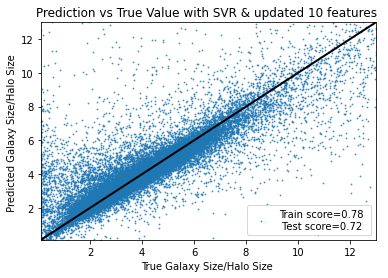

In [16]:
label = 'Train score={} \n Test score={}'.format(round(best_SVR_trainscore, 2),round(scores_SVR.mean(), 2) )
# label='Cross_val mean test score={}'.format(round(scores_RF.mean(),2))

plt.scatter(y, y_pred_SVR, s=3, marker='.', alpha=0.7, label=label)
plt.axis([0.1,13, 0.1,13])
plt.plot([0.0, 13], [0.0, 13], color = 'black', linewidth = 2)
plt.title('Prediction vs True Value with SVR & updated 10 features ')
plt.xlabel('True Galaxy Size/Halo Size ')
plt.ylabel(' Predicted Galaxy Size/Halo Size  ')
plt.legend(loc='lower right')
# plt.savefig('Prediction_vs_True_SVR_updated10feat.jpeg', dpi=500)
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()

## <font color='purple'> RF pipeline

In [17]:
regr_RF = RandomForestRegressor(random_state=0)

In [18]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]
# number of features at every split
# max_features = ['auto', 'sqrt']


# create random grid
grid = {'bootstrap': [True],
               'max_depth': [5, 10, None],
#                'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
#                'min_samples_split': [2, 5, 10],
               'n_estimators': n_estimators}
# Random search of parameters
# rfr_grid = GridSearchCV(estimator = regr_RF, param_grid = grid, cv = 3, verbose=1, n_jobs = -1)
rfr_grid = GridSearchCV(estimator = regr_RF, param_grid = grid, cv = KFold(n_splits=5, shuffle=True), \
                     verbose = 1, n_jobs = -1, return_train_score=True)

rfr_grid.fit(X, y)

print('Best params, best score:', "{:.4f}".format(rfr_grid.best_score_), \
    rfr_grid.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.8243 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}


In [19]:
print('Mean test score: {}'.format(rfr_grid.cv_results_['mean_test_score']))
print('Mean train score: {}'.format(rfr_grid.cv_results_['mean_train_score']))

Mean test score: [0.59319494 0.60072019 0.60465068 0.59369886 0.60157622 0.60519025
 0.59334276 0.60203322 0.60525588 0.78353568 0.79258046 0.7985147
 0.7828134  0.79317405 0.79876156 0.78463269 0.79569087 0.79928269
 0.80322487 0.81716746 0.82432186 0.80829371 0.81906292 0.82430608
 0.80627522 0.81747445 0.82089603]
Mean train score: [0.64100521 0.64990801 0.65166733 0.64039816 0.64956216 0.65141703
 0.64076872 0.64922959 0.65102576 0.91285988 0.92057175 0.92276657
 0.90833099 0.91600299 0.91813584 0.89457577 0.90183582 0.90394537
 0.96427028 0.97260061 0.97431664 0.95459828 0.96218189 0.96390095
 0.92851164 0.93584492 0.93730859]


In [20]:
best_RF=rfr_grid.best_estimator_ # The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.

In [21]:
rfr_grid.best_index_

20

In [22]:
rfr_grid.cv_results_['mean_train_score'][23]

0.9639009507119851

In [23]:
best_RF_trainscore=rfr_grid.cv_results_['mean_train_score'][rfr_grid.best_index_]

In [24]:
#  y_pred = rfr_grid.best_estimator_.predict(X_test)
y_pred_RF = cross_val_predict(best_RF, X, y, cv = KFold(n_splits=5, shuffle=True, random_state=10))

In [25]:
y_pred_RF

array([0.46201646, 2.26395628, 2.74224556, ..., 2.18837106, 2.54814493,
       2.02989855])

In [26]:
scores_RF = cross_val_score(best_RF, X, y, cv = KFold(n_splits=5, shuffle=True, random_state=10))

In [27]:
scores_RF

array([0.83972949, 0.82611978, 0.84903806, 0.78526282, 0.83494675])

In [28]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_RF.mean(), scores_RF.std() * 2))

Accuracy: 0.83 (+/- 0.04)


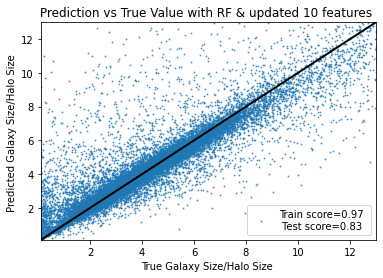

In [29]:
label = 'Train score={} \n Test score={}'.format(round(best_RF_trainscore, 2),round(scores_RF.mean(), 2) )
# label='Cross_val mean test score={}'.format(round(scores_RF.mean(),2))

plt.scatter(y, y_pred_RF, s=3, marker='.', alpha=0.7, label=label)
plt.axis([0.1,13, 0.1,13])
plt.plot([0.0, 13], [0.0, 13], color = 'black', linewidth = 2)
plt.title('Prediction vs True Value with RF & updated 10 features ')
plt.xlabel('True Galaxy Size/Halo Size ')
plt.ylabel(' Predicted Galaxy Size/Halo Size  ')
plt.legend(loc='lower right')
# plt.savefig('Prediction_vs_True_updated10feat.jpeg', dpi=500)
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()

## <font color='purple'> LR pipeline

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_train, y_train)

0.4844780072730033

In [32]:
reg.score(X_test, y_test)

0.4701054774538129

In [33]:
y_pred_LR = cross_val_predict(reg, X, y, cv = KFold(n_splits=5, shuffle=True, random_state=10))

In [34]:
y_pred_LR

array([1.51627421, 3.56830786, 1.7462058 , ..., 2.93010889, 3.90982145,
       1.50827184])

In [35]:
scores_reg = cross_val_score(reg, X, y, cv = KFold(n_splits=5, shuffle=True, random_state=10))

In [36]:
scores_reg

array([0.48886648, 0.45916569, 0.47624163, 0.10498928, 0.47927032])

In [37]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_reg.mean(), scores_reg.std() * 2))

Accuracy: 0.40 (+/- 0.30)


In [38]:
scores_reg.mean()

0.40170667972684404

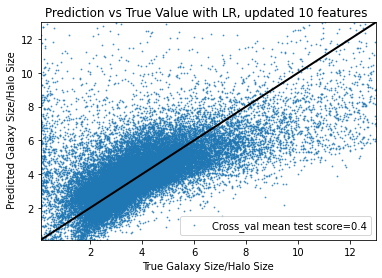

In [39]:
# label = 'Train score={} \n Test score={}'.format(round(reg.score(X_train, y_train), 2),round(reg.score(X_test, y_test), 2) )
label='Cross_val mean test score={}'.format(round(scores_reg.mean(),2))

plt.scatter(y, y_pred_LR, s=3, marker='.', alpha=0.7, label=label)
plt.axis([0.1,13, 0.1,13])
plt.plot([0.0, 13], [0.0, 13], color = 'black', linewidth = 2)
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.title('Prediction vs True Value with LR, updated 10 features ')
plt.xlabel('True Galaxy Size/Halo Size')
plt.ylabel(' Predicted Galaxy Size/Halo Size')
plt.legend(loc='lower right')

plt.show()

### The figure containing all the models - 10 features

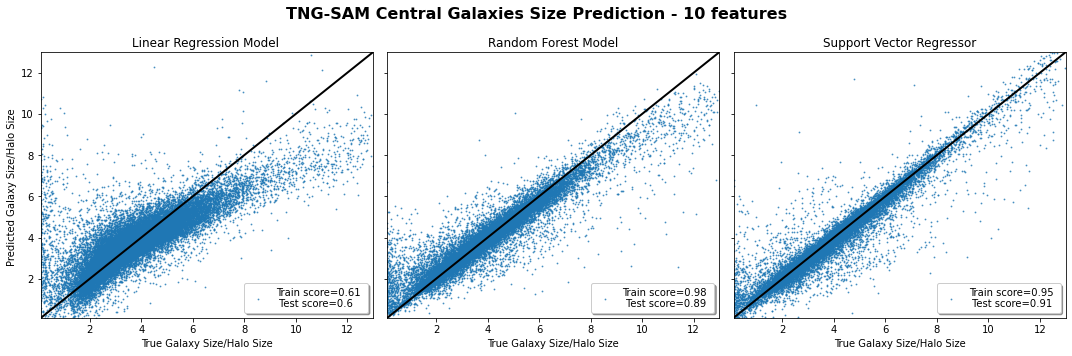

In [46]:
fig,[ax1, ax5, ax6 ]=plt.subplots(nrows=1,ncols=3,sharey=True, figsize=(15,5))
fig.suptitle('TNG-SAM Central Galaxies Size Prediction - 10 features', fontsize=16, fontweight='bold')
plt.subplots_adjust(hspace=0.0,wspace=0.0)

label = 'Train score={} \n Test score={}'.format(round(reg.score(X_train, y_train), 2),round(reg.score(X_test, y_test), 2) )
# print(label)
im1 = ax1.scatter(y, y_pred_LR, s=3, marker='.', alpha=0.7, label=label)
# ax1.set_xlim([9.0, 11.5])
# ax1.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax1.set_ylim([0.2,1.2])
ax1.axis([0.1,13, 0.1,13])
ax1.plot([0.0, 13], [0.0, 13], color = 'black', linewidth = 2)
ax1.set_title('Linear Regression Model ')
ax1.set_xlabel('True Galaxy Size/Halo Size')
ax1.set_ylabel('Predicted Galaxy Size/Halo Size ')
ax1.legend(loc='lower right', shadow=True)

label = 'Train score={} \n Test score={}'.format(round(best_RF_trainscore, 2),round(scores_RF.mean(), 2) )
im5 = ax5.scatter(y, y_pred_RF, s=3, marker='.', alpha=0.7, label=label)
# ax5.set_xlim([9.0, 11.5])
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim([0.2,1.2])
ax5.axis([0.1,13, 0.1,13])
ax5.plot([0.0, 13], [0.0, 13], color = 'black', linewidth = 2)
ax5.set_title('Random Forest Model')
ax5.set_xlabel('True Galaxy Size/Halo Size')
# ax5.set_ylabel('Predicted $ log_{10} $ Galaxy Size  [kpc] ')
ax5.legend(loc='lower right', shadow=True)

label = 'Train score={} \n Test score={}'.format(round(best_SVR_trainscore, 2),round(scores_SVR.mean(), 2) )
im6 = ax6.scatter(y, y_pred_SVR, s=3, marker='.', alpha=0.7, label=label)
# ax6.set_xlim([9.0, 11.5])
# ax6.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax6.set_ylim([0.2,1.2])
ax6.axis([0.1,13, 0.1,13])
ax6.plot([0.0, 13], [0.0, 13], color = 'black', linewidth = 2)
ax6.set_title('Support Vector Regressor')
ax6.set_xlabel('True Galaxy Size/Halo Size')
# ax6.set_ylabel('Predicted $ log_{10} $ Galaxy Size  [kpc] ')
ax6.legend(loc='lower right', shadow=True)
    
# grid = plt.GridSpec(3, 2)
# create_subtitle(fig, grid[0, ::], 'Linear Regression with only Stellar Mass as a feature')
# create_subtitle(fig, grid[1, ::], 'Linear Regression with only Halo Mass as a feature')
# create_subtitle(fig, grid[2, ::], 'Linear Regression vs Random Forest Regressor with all features')

# fig.subplots_adjust(hspace=0.0, wspace=0.0)
fig.tight_layout()
# plt.savefig("TNG-SAM_LR_RF_SVR_size_prediction_updated_10feat.jpeg", dpi=500)
plt.show()